In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', )))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from collections import Counter
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.gridspec as gridspec

import seaborn as sns

from config_colors import *
from config_paths import *
from nwb_io import *

from nilearn.plotting import plot_markers

# save panels directly to the relevant svg/ subdir
panel_save_dir = Path.cwd().parent.parent / "figure_generation" / "figure_spike_sorting" / "svg"

data_dir = NWB_data_dir

In [2]:
i = 0 

for path in tqdm(list(data_dir.glob("*.nwb"))):
    print(path)
    if path.is_dir():
        continue 

    patient_id = int(path.name.split(".")[0][3:])
    print(f"  {patient_id}")
    io = NWBHDF5IO(path, mode="r")
    nwbfile = io.read()

    df_units = nwbfile.units.to_dataframe()
    df_units["unit_id"] = np.arange(0, len(df_units))

    df_units.insert(0, "patient_id", [patient_id] * len(df_units), )
    
    if i == 0:
        df_units_all = df_units.copy()
    else:
        df_units_all = pd.concat([df_units_all, df_units], ignore_index=True)
    
    io.close()
    i += 1

  0%|          | 0/29 [00:00<?, ?it/s]

/media/al/Seagate/movies_dataset_nwb/sub14.nwb
  14


  3%|▎         | 1/29 [00:08<04:03,  8.70s/it]

/media/al/Seagate/movies_dataset_nwb/sub52.nwb
  52


  7%|▋         | 2/29 [00:41<10:20, 22.97s/it]

/media/al/Seagate/movies_dataset_nwb/sub53.nwb
  53


 10%|█         | 3/29 [00:45<06:09, 14.22s/it]

/media/al/Seagate/movies_dataset_nwb/sub60.nwb
  60


 14%|█▍        | 4/29 [01:02<06:27, 15.50s/it]

/media/al/Seagate/movies_dataset_nwb/sub61.nwb
  61


 17%|█▋        | 5/29 [01:23<06:52, 17.18s/it]

/media/al/Seagate/movies_dataset_nwb/sub64.nwb
  64


 21%|██        | 6/29 [01:42<06:52, 17.94s/it]

/media/al/Seagate/movies_dataset_nwb/sub65.nwb
  65


 24%|██▍       | 7/29 [01:48<05:06, 13.95s/it]

/media/al/Seagate/movies_dataset_nwb/sub66.nwb
  66


 28%|██▊       | 8/29 [02:03<04:58, 14.23s/it]

/media/al/Seagate/movies_dataset_nwb/sub68.nwb
  68


 31%|███       | 9/29 [02:27<05:47, 17.36s/it]

/media/al/Seagate/movies_dataset_nwb/sub88.nwb
  88


 34%|███▍      | 10/29 [02:38<04:53, 15.44s/it]

/media/al/Seagate/movies_dataset_nwb/sub89.nwb
  89


 38%|███▊      | 11/29 [02:52<04:27, 14.87s/it]

/media/al/Seagate/movies_dataset_nwb/sub90.nwb
  90


 41%|████▏     | 12/29 [03:01<03:46, 13.33s/it]

/media/al/Seagate/movies_dataset_nwb/sub92.nwb
  92


 45%|████▍     | 13/29 [03:33<05:00, 18.78s/it]

/media/al/Seagate/movies_dataset_nwb/sub20.nwb
  20


 48%|████▊     | 14/29 [03:44<04:10, 16.67s/it]

/media/al/Seagate/movies_dataset_nwb/sub23.nwb
  23


 52%|█████▏    | 15/29 [03:58<03:38, 15.62s/it]

/media/al/Seagate/movies_dataset_nwb/sub28.nwb
  28


 55%|█████▌    | 16/29 [04:46<05:30, 25.44s/it]

/media/al/Seagate/movies_dataset_nwb/sub30.nwb
  30


 59%|█████▊    | 17/29 [05:07<04:50, 24.20s/it]

/media/al/Seagate/movies_dataset_nwb/sub96.nwb
  96


 62%|██████▏   | 18/29 [05:42<05:02, 27.52s/it]

/media/al/Seagate/movies_dataset_nwb/sub33.nwb
  33


 66%|██████▌   | 19/29 [06:17<04:56, 29.69s/it]

/media/al/Seagate/movies_dataset_nwb/sub39.nwb
  39


 69%|██████▉   | 20/29 [06:24<03:25, 22.79s/it]

/media/al/Seagate/movies_dataset_nwb/sub41.nwb
  41


 72%|███████▏  | 21/29 [06:31<02:24, 18.05s/it]

/media/al/Seagate/movies_dataset_nwb/sub42.nwb
  42


 76%|███████▌  | 22/29 [07:12<02:54, 24.90s/it]

/media/al/Seagate/movies_dataset_nwb/sub44.nwb
  44


 79%|███████▉  | 23/29 [07:21<02:00, 20.16s/it]

/media/al/Seagate/movies_dataset_nwb/sub98.nwb
  98


 83%|████████▎ | 24/29 [07:28<01:20, 16.11s/it]

/media/al/Seagate/movies_dataset_nwb/sub31.nwb
  31


 86%|████████▌ | 25/29 [07:56<01:18, 19.73s/it]

/media/al/Seagate/movies_dataset_nwb/sub73.nwb
  73


 90%|████████▉ | 26/29 [08:23<01:06, 22.04s/it]

/media/al/Seagate/movies_dataset_nwb/sub83.nwb
  83


 93%|█████████▎| 27/29 [08:50<00:46, 23.46s/it]

/media/al/Seagate/movies_dataset_nwb/sub87.nwb
  87


 97%|█████████▋| 28/29 [08:57<00:18, 18.62s/it]

/media/al/Seagate/movies_dataset_nwb/sub50.nwb
  50


100%|██████████| 29/29 [09:07<00:00, 18.86s/it]


In [15]:
region_exclusion = ["H", "T", "Ta", "Tb", "I"]
df_units_release = df_units_all[~df_units_all.isin(region_exclusion).any(axis=1)]

regions = df_units_release["brain_region"].copy()
units_regions = pd.Series(regions).replace("AH","H").replace("MH", "H").replace("PH", "H").replace("APH","PHC").replace("MPH","PHC").replace("PPH","PHC")
df_units_release.loc[:, "brain_region_general"] = units_regions.copy()

/tmp/ipykernel_41133/2086511247.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_units_release.loc[:, "brain_region_general"] = units_regions.copy()


In [ ]:
df_units_release[""]

,patient_id,csc_nr,brain_region,hemisphere,single_unit,peak_SNR,isi_violations,cv2,cell_type,region_pre_review,spike_times,waveforms,unit_id,brain_region_general
0,14,6,A,L,1,12.919684,0.0,1.213126,pyramidal,A,"[1315.1623164117336, 1510.5663691461086, 13752...","[[-2.1165488, -1.6475253, -1.5800225, -1.16021...",0,A
1,14,9,AH,L,0,1.957926,0.0,1.100954,multi-unit,AH,"[3907.021226555109, 5742.318857431412, 6038.12...","[[13.252361, 12.868696, 12.129114, 11.130464, ...",1,H
2,14,9,AH,L,1,5.729382,0.0,1.046567,pyramidal,AH,"[960.7311640679836, 5020.027818351984, 7724.80...","[[-9.446356, -8.116054, -6.26089, -4.2645445, ...",2,H
3,14,9,AH,L,1,6.701846,0.0,0.972465,pyramidal,AH,"[222.26680859923363, 3132.179917961359, 4152.3...","[[-0.8951038, -0.72394025, -1.3422443, -1.7823...",3,H
4,14,9,AH,L,1,12.200891,0.0,1.060346,pyramidal,AH,"[5485.268296867609, 5741.403330087662, 5892.25...","[[-3.0092745, -2.1483228, -1.9083307, -3.09450...",4,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2355,50,71,MH,R,0,5.763987,0.0,1.164811,multi-unit,MH,"[15563.46140819788, 36457.66396480799, 114479....","[[-3.8179698, -4.453179, -3.44229, -0.5230112,...",47,H
2356,50,74,PHC,R,0,5.609906,0.0,1.062490,multi-unit,PHC,"[6067.791904270649, 9326.520931601524, 9955.91...","[[-6.146473, -7.954259, -5.1579747, -1.0895112...",48,PHC
2357,50,75,PHC,R,0,6.375948,0.0,1.143938,multi-unit,PHC,"[15.69739842414856, 1611.2174179553986, 3491.4...","[[-2.5453918, -6.756025, -9.582641, -6.535035,...",49,PHC
2358,50,76,PHC,R,0,7.785231,0.0,0.915634,multi-unit,PHC,"[3.2767441272735596, 191.57020115852356, 216.8...","[[-0.18902391, 1.3903345, 0.05283926, -2.73895...",50,PHC


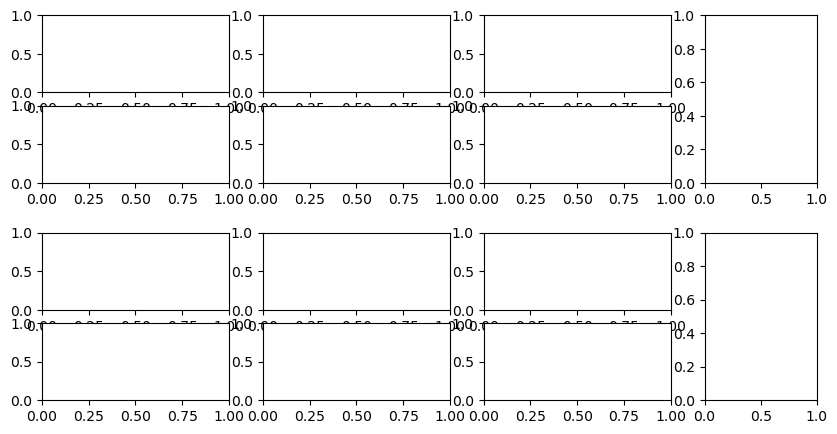

In [4]:
fig = plt.figure(constrained_layout=False, figsize=(10, 5))
gs = fig.add_gridspec(nrows=5, ncols=4,
                       height_ratios=[1, 1, 0.3, 1, 1], 
                       width_ratios=[1, 1, 1, 0.6])

# units per channel
ax0 = fig.add_subplot(gs[0:1, 0:1])


ax1 = fig.add_subplot(gs[1:2, 0:1])


# firing rate
ax0 = fig.add_subplot(gs[0:1, 1:2])


ax1 = fig.add_subplot(gs[1:2, 1:2])


# spike peak SNR
ax0 = fig.add_subplot(gs[0:1, 2:3])


ax1 = fig.add_subplot(gs[1:2, 2:3])


# ISI violations
ax0 = fig.add_subplot(gs[3:4, 0:1])


ax1 = fig.add_subplot(gs[4:, 0:1])


# CV2
ax0 = fig.add_subplot(gs[3:4, 1:2])


ax1 = fig.add_subplot(gs[4:, 1:2])


# isolation distance
ax0 = fig.add_subplot(gs[3:4, 2:3])


ax1 = fig.add_subplot(gs[4:, 2:3])


# single-unit vs multi-units
ax0 = fig.add_subplot(gs[0:2, 3])

# pyramidal cells vs interneurons
ax1 = fig.add_subplot(gs[3:, 3])

plt.show()